In [33]:
%pip install seaborn scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, normalize
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_csv('Air_Quality.csv')

## Q1: DATA LOADING AND EXPLORATION

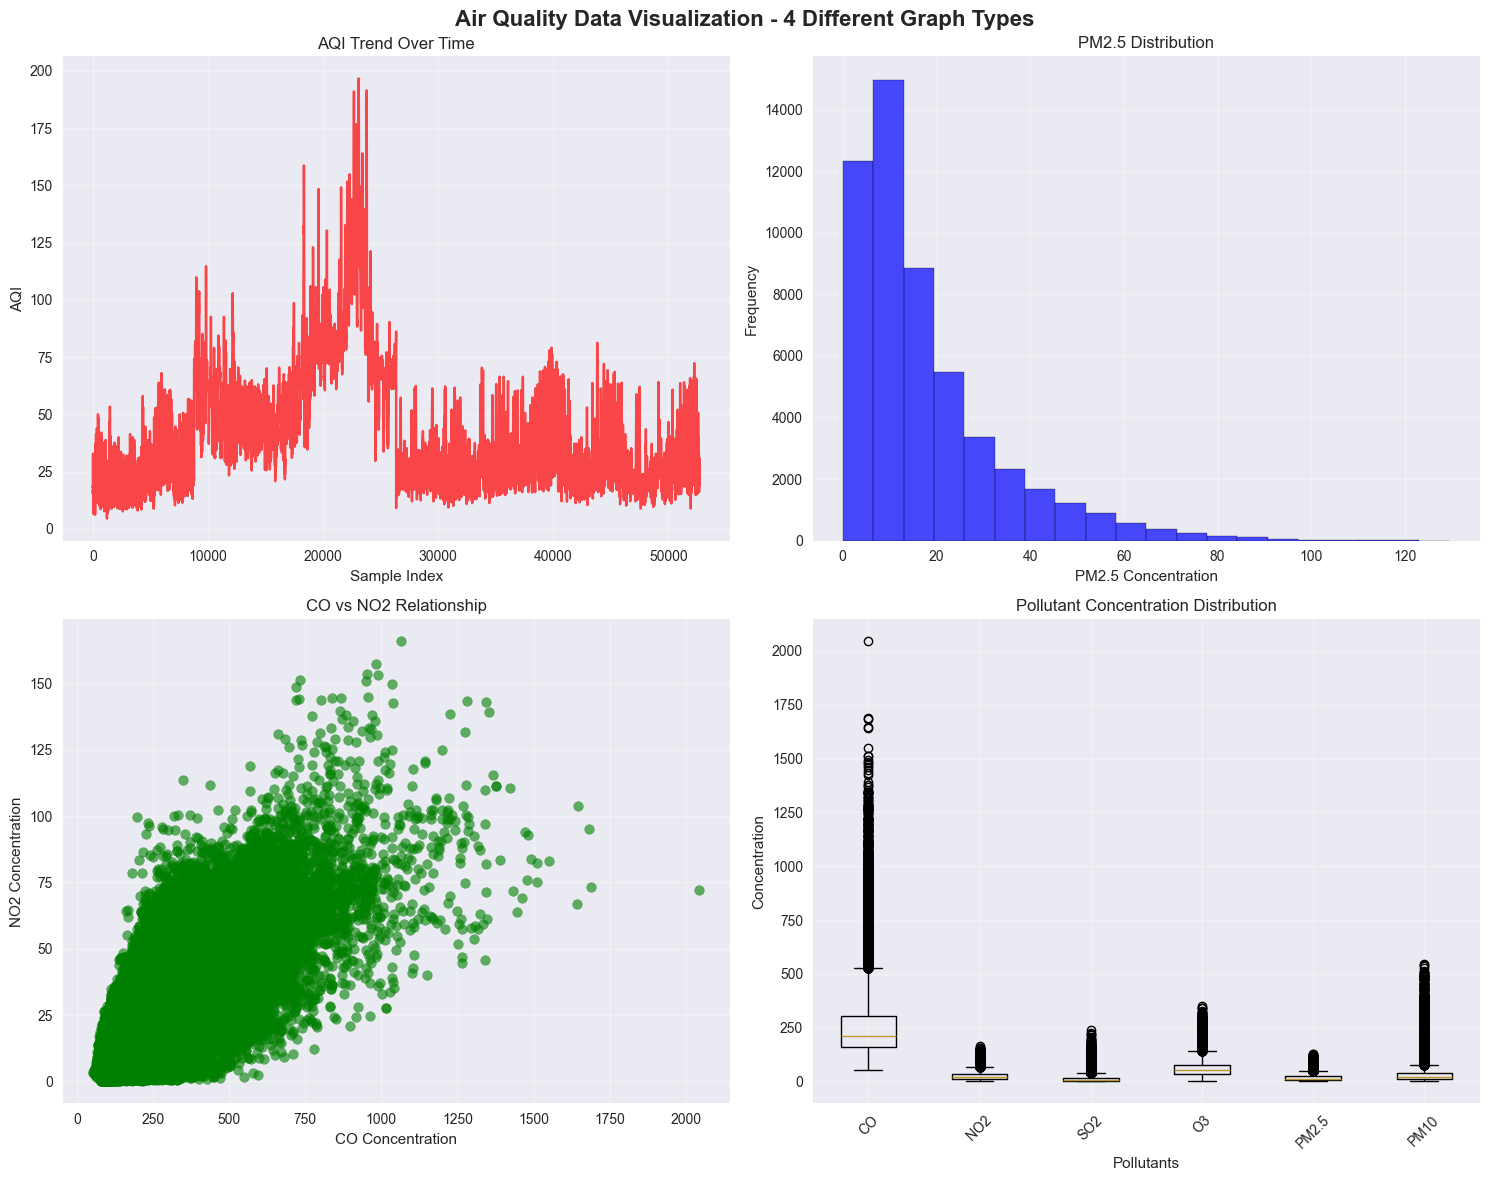

In [35]:
# Create a figure with subplots for 4 different graphs
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Air Quality Data Visualization - 4 Different Graph Types', fontsize=16, fontweight='bold')

# Graph 1: Line plot for AQI over time
axes[0, 0].plot(df.index, df['AQI'], color='red', alpha=0.7)
axes[0, 0].set_title('AQI Trend Over Time')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('AQI')
axes[0, 0].grid(True, alpha=0.3)

# Graph 2: Histogram for PM2.5 distribution
axes[0, 1].hist(df['PM2.5'].dropna(), bins=20, color='blue', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('PM2.5 Distribution')
axes[0, 1].set_xlabel('PM2.5 Concentration')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Graph 3: Scatter plot for CO vs NO2
axes[1, 0].scatter(df['CO'], df['NO2'], alpha=0.6, color='green')
axes[1, 0].set_title('CO vs NO2 Relationship')
axes[1, 0].set_xlabel('CO Concentration')
axes[1, 0].set_ylabel('NO2 Concentration')
axes[1, 0].grid(True, alpha=0.3)

# Graph 4: Box plot for pollutant concentrations
pollutants = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
pollutant_data = [df[col].dropna() for col in pollutants if col in df.columns]
axes[1, 1].boxplot(pollutant_data, labels=pollutants)
axes[1, 1].set_title('Pollutant Concentration Distribution')
axes[1, 1].set_xlabel('Pollutants')
axes[1, 1].set_ylabel('Concentration')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Q2: Understanding Data

### Q2.1: Display Number of Samples and Attributes

In [36]:
df.shape

(52704, 10)

### Q2.2: Display All Column Names

In [37]:
df.columns.tolist()

['Date', 'City', 'CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']

### Q2.3: Display Structure of DataFrame

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


### Q2.4: Display Statistical Information

In [39]:
df.describe()

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
count,52704.000000,9648.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,258.258121,462.348259,24.102998,12.569869,60.025729,17.689931,35.643143,41.349339
std,159.589953,33.769009,19.363443,17.266623,38.217348,15.670075,48.444774,26.626149
min,52.000000,434.000000,0.000000,0.000000,0.000000,0.100000,0.100000,4.450000
25%,159.000000,445.000000,9.700000,2.300000,35.000000,6.900000,10.200000,22.800000
50%,213.000000,453.000000,18.900000,5.700000,54.000000,12.500000,18.900000,31.270835
75%,306.000000,467.000000,33.400000,16.800000,78.000000,23.000000,37.500000,57.702089
max,2045.000000,884.000000,165.900000,239.700000,349.000000,129.500000,543.900000,196.633330


### Q2.5: Display Number of Samples Based on Particular Column

In [40]:
df['City'].value_counts()

City
Brasilia    8784
Cairo       8784
Dubai       8784
London      8784
New York    8784
Sydney      8784
Name: count, dtype: int64


## Q3: Independent and Dependent Variables

### Q3.1: Extract Independent and Dependent Variables

In [41]:
independent_vars = ['CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
dependent_var = 'AQI'

# Extract variables
X = df[independent_vars]  # Independent variables
y = df[dependent_var]     # Dependent variable

X.shape, y.shape

((52704, 7), (52704,))


### Q3.2: Interpretation of Variables

In [42]:
X.head()

,CO,CO2,NO2,SO2,O3,PM2.5,PM10
0,323.0,NaN,23.8,2.8,42.0,12.0,17.1
1,318.0,NaN,21.9,2.7,40.0,12.5,17.9
2,309.0,NaN,19.2,2.6,39.0,12.1,17.3
3,295.0,NaN,16.3,2.4,38.0,11.4,16.2
4,270.0,NaN,13.0,2.1,40.0,10.2,14.6


In [43]:
y.head()

0    16.800000
1    16.000000
2    15.599999
3    15.200000
4    16.000000
Name: AQI, dtype: float64


## Q4: Unique Values Analysis

### Q4.1: Find Unique Values from Column


In [44]:
unique_cities = df['City'].unique()
unique_cities

array(['Brasilia', 'Cairo', 'Dubai', 'London', 'New York', 'Sydney'],
      dtype=object)


### Q4.2: Count Unique Values from Column

In [45]:
df['City'].value_counts()

City
Brasilia    8784
Cairo       8784
Dubai       8784
London      8784
New York    8784
Sydney      8784
Name: count, dtype: int64

### Q4.3: Unique Value Counts for All Columns

In [46]:
unique_counts = {}
for col in df.columns:
    unique_counts[col] = df[col].nunique()

pd.Series(unique_counts)

Date      8784
City         6
CO        1094
CO2        245
NO2       1118
SO2       1164
O3         307
PM2.5      858
PM10      1751
AQI      19720
dtype: int64


## Q5: Missing Values Analysis

### Q5.1: Find Missing Values


In [47]:
df.isnull().sum()

Date         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64

### Q5.2: Find Non-Missing Values

In [48]:
df.notnull().sum()

Date     52704
City     52704
CO       52704
CO2       9648
NO2      52704
SO2      52704
O3       52704
PM2.5    52704
PM10     52704
AQI      52704
dtype: int64

### Q5.3: Missing Values Percentage

In [49]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': missing_percentage
})
missing_info

,Missing Count,Missing Percentage
Date,0,0.000000
City,0,0.000000
CO,0,0.000000
CO2,43056,81.693989
NO2,0,0.000000
SO2,0,0.000000
O3,0,0.000000
PM2.5,0,0.000000
PM10,0,0.000000
AQI,0,0.000000



### Q5.4: Visualize Missing Values


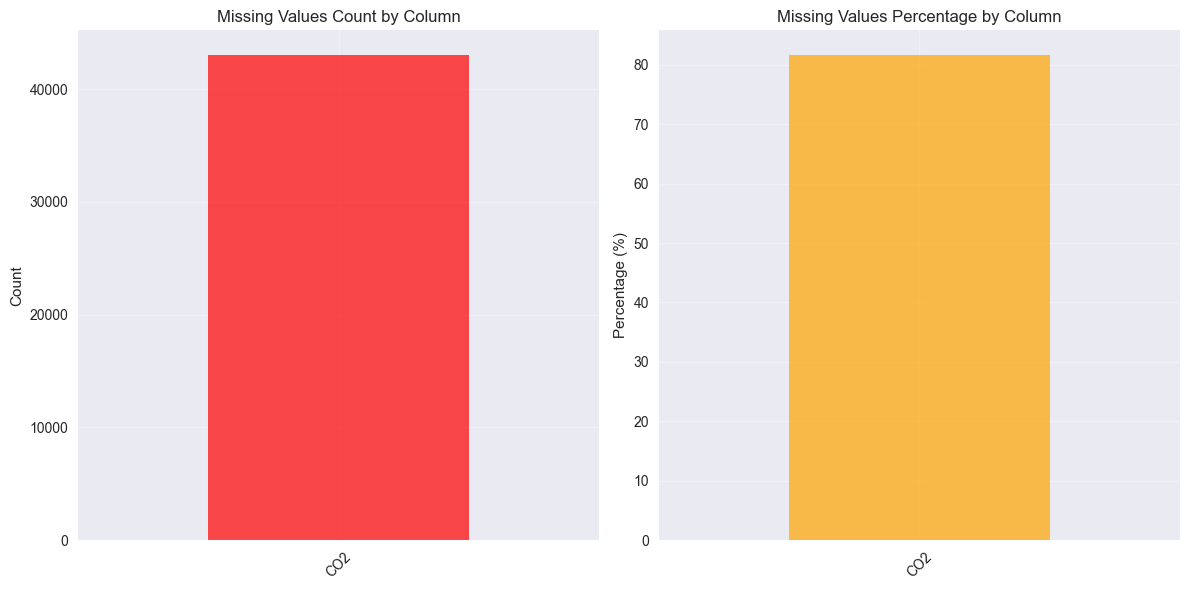

In [51]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
missing_values = df.isnull().sum()
missing_values[missing_values > 0].plot(kind='bar', color='red', alpha=0.7)
plt.title('Missing Values Count by Column')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
missing_percentage[missing_percentage > 0].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Missing Values Percentage by Column')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Q6: Handling Missing Data and Duplicates

### Q6.1: Delete Rows with Missing Values

In [54]:
df_processed = df.copy()

# Delete rows with missing values
df_dropped_rows = df_processed.dropna()
df_dropped_rows.shape

(9648, 10)

### Q6.2: Replace Missing Values with Mean

In [56]:
df_filled = df_processed.copy()
numerical_cols = df_filled.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    if df_filled[col].isnull().any():
        mean_value = df_filled[col].mean()
        df_filled[col].fillna(mean_value, inplace=True)

df_filled.isnull().sum()

Date     0
City     0
CO       0
CO2      0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64

### Q6.3: Handle Duplicates - First Value as Unique

In [58]:
df_first_unique = df_processed.drop_duplicates(keep='first')
df_first_unique.shape

(52704, 10)

### Q6.4: Handle Duplicates - Last Value as Unique

In [60]:
df_last_unique = df_processed.drop_duplicates(keep='last')
df_last_unique.shape

(52704, 10)

### Q6.5: Handle Duplicates - All Values as Duplicates

In [62]:
df_no_duplicates = df_processed.drop_duplicates(keep=False)
df_no_duplicates.shape

(52704, 10)

### Q6.6: Drop Columns Above Threshold

In [67]:
threshold = 0.5  # 50% threshold
high_missing_cols = missing_percentage[missing_percentage > threshold * 100].index

if len(high_missing_cols) > 0:
    df_threshold = df_processed.drop(columns=high_missing_cols)
else:
    df_threshold = df_processed.copy()
df_threshold.shape


(52704, 9)

### Q6.7: Final Processed Dataset

In [69]:
df_final = df_filled.copy()
df_final.shape

(52704, 10)

## Q7: Categorical Data Encoding

### Q7.1: Identify Categorical Columns

In [72]:
categorical_cols = df_final.select_dtypes(include=['object']).columns
categorical_cols.tolist()

['Date', 'City']

### Q7.2: Apply Label Encoding

In [73]:
df_encoded = df_final.copy()
label_encoders = {}

for col in categorical_cols:
    if col != 'Date':  # Skip Date column for now
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

df_encoded.head()

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,0,323.0,462.348259,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,0,318.0,462.348259,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,0,309.0,462.348259,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,0,295.0,462.348259,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,0,270.0,462.348259,13.0,2.1,40.0,10.2,14.6,16.000000



### Q7.3: Display Encoding Mappings

In [75]:
for col in categorical_cols:
    if col != 'Date' and col in label_encoders:
        le = label_encoders[col]
        unique_values = df_final[col].unique()
        encoded_values = le.transform(unique_values.astype(str))
        
        mapping_df = pd.DataFrame({
            'Original': unique_values,
            'Encoded': encoded_values
        })
        display(f"Label Encoding for '{col}':")
        display(mapping_df)


"Label Encoding for 'City':"

,Original,Encoded
0,Brasilia,0
1,Cairo,1
2,Dubai,2
3,London,3
4,New York,4
5,Sydney,5



## Q8: Train-Test Split

### Q8.1: Prepare Features and Target

In [78]:
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
X_features = df_encoded[numeric_cols].drop(columns=['AQI'] if 'AQI' in numeric_cols else [])
y_target = df_encoded['AQI'] if 'AQI' in df_encoded.columns else df_encoded.iloc[:, -1]

X_features.shape, y_target.shape

((52704, 8), (52704,))


### Q8.2: Split Without Random State

In [80]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_features, y_target, test_size=0.25, train_size=0.75
)

X_train1.shape, X_test1.shape

((39528, 8), (13176, 8))

### Q8.3: Split With Random State

In [82]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_features, y_target, test_size=0.25, train_size=0.75, random_state=42
)

X_train2.shape, X_test2.shape

((39528, 8), (13176, 8))


### Q8.4: Compare Random State Effect

In [84]:
X_train_temp1, X_test_temp1, _, _ = train_test_split(X_features, y_target, test_size=0.25)
X_train_temp2, X_test_temp2, _, _ = train_test_split(X_features, y_target, test_size=0.25)

# Compare first few indices
comparison_df = pd.DataFrame({
    'Split 1 Indices': X_train_temp1.index[:10].tolist(),
    'Split 2 Indices': X_train_temp2.index[:10].tolist()
})
comparison_df

,Split 1 Indices,Split 2 Indices
0,8162,49858
1,33320,2047
2,29232,13716
3,8056,31902
4,50444,42202
5,49025,52064
6,9346,15684
7,29552,40275
8,43974,33206
9,35895,46577



## Q9: Feature Scaling - Standardization

### Q9.1: Apply Standardization

In [86]:
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train2)
X_test_scaled = scaler_standard.transform(X_test2)

X_train_scaled.shape

(39528, 8)

### Q9.2: Display Standardization Parameters

In [88]:
stats_df = pd.DataFrame({
    'Feature': X_features.columns,
    'Mean': scaler_standard.mean_,
    'Standard Deviation': scaler_standard.scale_
})
stats_df

,Feature,Mean,Standard Deviation
0,City,2.500076,1.705290
1,CO,258.418412,159.375937
2,CO2,462.365810,14.439886
3,NO2,24.119705,19.352004
4,SO2,12.617658,17.218315
5,O3,60.192547,38.331060
6,PM2.5,17.752082,15.713657
7,PM10,35.996491,49.142103



### Q9.3: Verify Standardization Results

In [90]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_features.columns)

verification_df = pd.DataFrame({
    'Feature': X_features.columns,
    'Standardized Mean': X_train_scaled_df.mean(),
    'Standardized Std': X_train_scaled_df.std()
})
verification_df

,Feature,Standardized Mean,Standardized Std
City,City,-4.493920e-17,1.000013
CO,CO,1.731058e-16,1.000013
CO2,CO2,3.398303e-15,1.000013
NO2,NO2,-2.211009e-17,1.000013
SO2,SO2,-7.994684e-17,1.000013
O3,O3,5.824121e-17,1.000013
PM2.5,PM2.5,5.752218e-18,1.000013
PM10,PM10,6.902662e-17,1.000013



### Q9.4: Example Standardization Calculation

In [93]:
if len(X_features.columns) > 0:
    first_col = X_features.columns[0]
    original_value = X_train2.iloc[0, 0]
    mean_val = scaler_standard.mean_[0]
    std_val = scaler_standard.scale_[0]
    standardized_value = (original_value - mean_val) / std_val
    
    calculation_df = pd.DataFrame({
        'Parameter': ['Original Value', 'Mean', 'Standard Deviation', 'Standardized Value'],
        'Value': [original_value, mean_val, std_val, standardized_value]
    })
calculation_df

,Parameter,Value
0,Original Value,5.000000
1,Mean,2.500076
2,Standard Deviation,1.705290
3,Standardized Value,1.465982



## Q10: Normalization and Comparison

### Q10.1: Min-Max Normalization

In [95]:
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train2)
X_test_minmax = scaler_minmax.transform(X_test2)

# Min-Max normalized data statistics
X_train_minmax_df = pd.DataFrame(X_train_minmax, columns=X_features.columns)

minmax_stats = pd.DataFrame({
    'Feature': X_features.columns,
    'Min Value': X_train_minmax_df.min(),
    'Max Value': X_train_minmax_df.max()
})
minmax_stats

,Feature,Min Value,Max Value
City,City,0.0,1.0
CO,CO,0.0,1.0
CO2,CO2,0.0,1.0
NO2,NO2,0.0,1.0
SO2,SO2,0.0,1.0
O3,O3,0.0,1.0
PM2.5,PM2.5,0.0,1.0
PM10,PM10,0.0,1.0


### Q10.2: L2 Normalization

In [98]:
X_train_l2 = normalize(X_train2, norm='l2')
X_test_l2 = normalize(X_test2, norm='l2')

# Calculate L2 norms to verify
l2_norms = np.sqrt(np.sum(X_train_l2**2, axis=1))
l2_verification = pd.DataFrame({
    'Sample Index': range(5),
    'L2 Norm': l2_norms[:5]
})
l2_verification

,Sample Index,L2 Norm
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


### Q10.3: Comparison Visualization

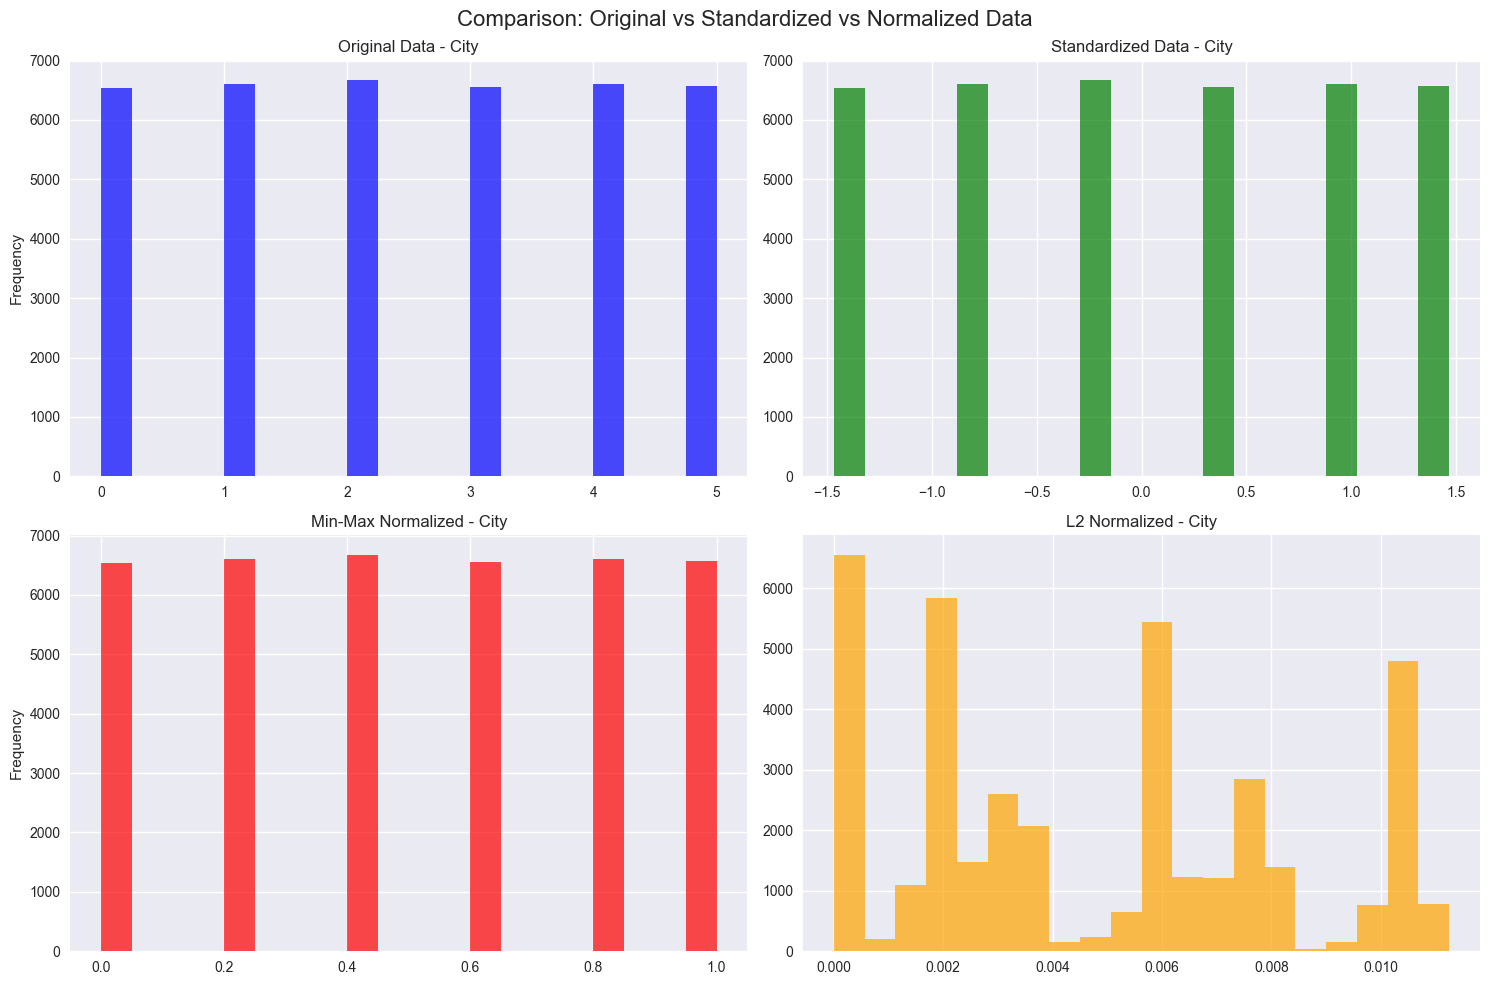

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparison: Original vs Standardized vs Normalized Data', fontsize=16)

# Select first feature for comparison
feature_idx = 0
feature_name = X_features.columns[feature_idx]

# Original data
axes[0, 0].hist(X_train2.iloc[:, feature_idx], bins=20, alpha=0.7, color='blue')
axes[0, 0].set_title(f'Original Data - {feature_name}')
axes[0, 0].set_ylabel('Frequency')

# Standardized data
axes[0, 1].hist(X_train_scaled[:, feature_idx], bins=20, alpha=0.7, color='green')
axes[0, 1].set_title(f'Standardized Data - {feature_name}')

# Min-Max normalized data
axes[1, 0].hist(X_train_minmax[:, feature_idx], bins=20, alpha=0.7, color='red')
axes[1, 0].set_title(f'Min-Max Normalized - {feature_name}')
axes[1, 0].set_ylabel('Frequency')

# L2 normalized data
axes[1, 1].hist(X_train_l2[:, feature_idx], bins=20, alpha=0.7, color='orange')
axes[1, 1].set_title(f'L2 Normalized - {feature_name}')

plt.tight_layout()
plt.show()


### Q10.4: Summary Statistics Comparison

In [ ]:
feature_name = X_features.columns[0]

comparison_stats = pd.DataFrame({
    'Scaling Method': ['Original', 'Standardized', 'Min-Max', 'L2'],
    'Mean': [
        X_train2.iloc[:, 0].mean(),
        X_train_scaled[:, 0].mean(),
        X_train_minmax[:, 0].mean(),
        X_train_l2[:, 0].mean()
    ],
    'Std': [
        X_train2.iloc[:, 0].std(),
        X_train_scaled[:, 0].std(),
        X_train_minmax[:, 0].std(),
        X_train_l2[:, 0].std()
    ],
    'Min': [
        X_train2.iloc[:, 0].min(),
        X_train_scaled[:, 0].min(),
        X_train_minmax[:, 0].min(),
        X_train_l2[:, 0].min()
    ],
    'Max': [
        X_train2.iloc[:, 0].max(),
        X_train_scaled[:, 0].max(),
        X_train_minmax[:, 0].max(),
        X_train_l2[:, 0].max()
    ]
})
comparison_stats


,Scaling Method,Mean,Std,Min,Max
0,Original,2.500076e+00,1.705312,0.000000,5.000000
1,Standardized,-4.493920e-17,1.000000,-1.466071,1.465982
2,Min-Max,5.000152e-01,0.341058,0.000000,1.000000
3,L2,4.748114e-03,0.003538,0.000000,0.011250



### Q10.5: Final Dataset Summary

In [104]:
summary_df = pd.DataFrame({
    'Metric': [
        'Original Dataset Shape',
        'Final Dataset Shape',
        'Features for Modeling',
        'Training Samples',
        'Test Samples'
    ],
    'Value': [
        df.shape,
        df_final.shape,
        len(X_features.columns),
        X_train2.shape[0],
        X_test2.shape[0]
    ]
})
summary_df


,Metric,Value
0,Original Dataset Shape,"(52704, 10)"
1,Final Dataset Shape,"(52704, 10)"
2,Features for Modeling,8
3,Training Samples,39528
4,Test Samples,13176
